<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/WeBWorK7HomeworkHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeBWorK 7 Homework Helper

## WeBWorK 1

The rectangles in the graph below illustrate a left endpoint Riemann sum for $f(x)=−\frac {x^2}4+2x$ on the interval $[2,6]$.
The value of this left endpoint Riemann sum is?

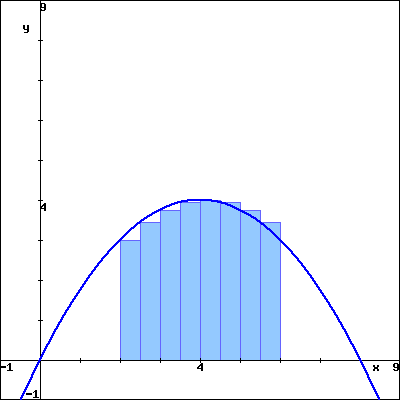




Here there are 8 rectangles using the left value.  Let's define the function and preform the sum.

In [16]:
def f(x):
  return -x**2/4+2*x

sum =0
for i in range(8):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum

14.625

The rectangles in the graph below illustrate a right endpoint Riemann sum for f(x)=−x24+2x on the interval [2,6].
The value of this right endpoint Riemann sum is?

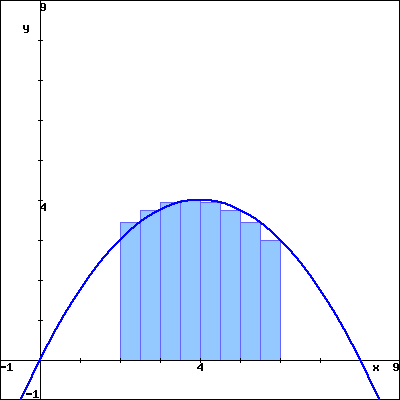

Again 8 rectangles but right endpoints.  I'll just shift my for loop to start at 1.

In [17]:
sum =0
for i in range(1,9):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum

14.625

Using the left and right Riemann sums above, we definitively conclude that

 $$
 
 ≤\int_2^4−\frac{x^2}4+2x\ dx≤ 
$$


 $$
 
 ≤\int_4^6−\frac{x^2}4+2x\ dx≤ 
$$




 $$
 
 ≤\int_2^6−\frac{x^2}4+2x\ dx≤ 
$$


There are several things to do here.  Neither of the previous was it clear if they were an over or under estimate BUT on $[2,4]$ the first was under and the second over!  Let's redo those!

In [18]:
sum =0
for i in range(4):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #Under estimate

7.0625

In [19]:
sum =0
for i in range(1,5):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #over estimate

7.5625

For the second bounds I do something similar

In [20]:
sum =0
for i in range(4,8):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #over estimate (left points)

7.5625

In [21]:
sum =0
for i in range(5,9):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #Under estimate (right points)

7.0625

All that is left is the bound on the last integral!  They are simply the sum of the previous bounds!  2*7.0625 and 2*7.5625

In [22]:
print( 2*7.0625, 2*7.5625)

14.125 15.125


## WeBWorK 6

Using the graph of $3+\cos(5x)$, for $0\leq x\leq \frac{3\pi}5$, list the following quantities in increasing order:

1. the value of the integral $\int_0^{\frac{3\pi}5}(3+\cos(5x))dx$,
2. the left sum with n=3 subdivisions, and
3. the right sum with n=3 subdivisions.

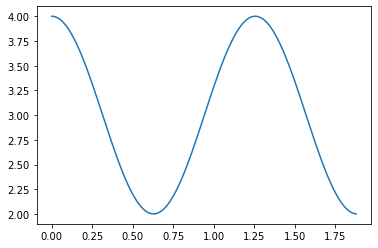

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,3*np.pi/5,.01)
y = 3+np.cos(5*x)
plt.plot(x,y)

So I thought by looking at the graph I would know how the function behaves but I don't!  Let's compute the three points for each division!

In [24]:
x2 = np.linspace(0,3*np.pi/5,4)
y2 = 3+np.cos(5*x2)

Text(0.5, 1.0, 'Left End Points')

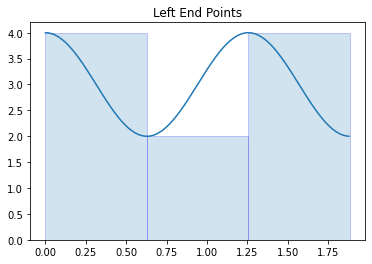

In [25]:
plt.bar(x2[:-1],y2[:-1],width = np.pi/5, alpha = 0.2, align = 'edge', edgecolor = 'b')
plt.plot(x,y)
plt.title('Left End Points')

Text(0.5, 1.0, 'Right End Points')

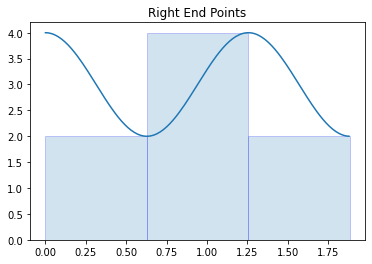

In [26]:
plt.bar(x2[1:],y2[1:],width = -np.pi/5, alpha = 0.2, align = 'edge', edgecolor = 'b')
plt.plot(x,y)
plt.title('Right End Points')

So clearly the left end points are an over estimation, right are an under estimation!  I'll use python to compute the integral even though I could do it by hand...

In [27]:
from scipy import integrate

integrate.quad(lambda x: 3+np.cos(5*x),0,3*np.pi/5)

(5.654866776461628, 6.278163296415537e-14)

## Adding My Functions

I've already created some of the functions for doing this in my version of the project so I am going to bring them over and quit doing these the hard way but use the package I already have built!

In [28]:
def deltax(a,b,n):
  return (b-a)/n

def riemannSum(function,a,b,n,indicator = 'right'):
  dx = deltax(a,b,n)
  if indicator == 'right':
    start = 1
  elif indicator == 'left':
    start = 0
  elif indicator == 'mid':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum = sum + function(a + j*dx)*dx
  return sum

def simpson(function, a, b , n):
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1,n,2): #odds
    sum = sum + 4*function(a+dx*i)
  for i in range(0,n,2): #evens
    sum = sum + 2*function(a+dx*i)
  for i in [a,b]: #endpoints
    sum = sum + function(i)
  sum = dx /3 *sum #multiply by the width/3
  return sum

def trap (function, a, b, n):
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1,n):
    sum = sum + 2*function(a+i*dx)
  for i in [a,b]:
    sum = sum +function(i)
  sum = dx/2 *sum
  return sum


## WeBWorK 8 

Estimate $\int_{0}^{1} {\cos(x^2)}\ dx$ using (a) the Trapezoidal Rule and (b) the Midpoint Rule, each with n = 4. Give each answer correct to five decimal places.

Using these functions makes my life really easy...

In [29]:
f = lambda x: np.cos(x**2)
trap(f, 0,1,4)

0.8957588961439704

In [30]:
riemannSum(f,0,1,4,indicator='mid')

0.9089067907384616

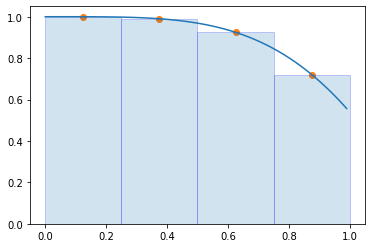

In [41]:
x = np.arange(0,1,.01)
y = f(x)
x2 = np.linspace(0,1,5)+1/8
y2 = f(x2)


plt.bar(x2[:-1]-1/8,y2[:-1],width = 1/4, alpha = 0.2, align = 'edge', edgecolor = 'b')
plt.scatter(x2[:-1],y2[:-1])
plt.plot(x,y)

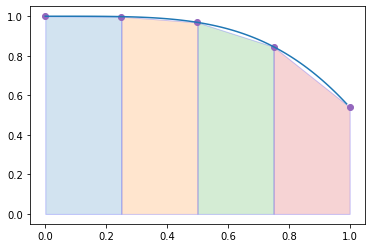

In [39]:
x3 = np.linspace(0,1,5)
y3 = f(x3)
for i in range(4):
  plt.fill_between([x3[i],x3[i+1]],[y3[i],y3[i+1]],alpha = 0.2, edgecolor = 'b')
plt.scatter(x3,y3)
plt.plot(x,y)

Sorry for the clown looking visualization, it is what I get for doing the for loop instead of typing them all out.

In any case we see that the midpoint is an overestimate and the trapazoid is an underestimate